---
**<h1><center> </center></h1>**

**<h1><center> Proyecto: Clasificación de cáncer de piel </center></h1>**

**<h2><center> [tipos] </center></h2>**

**<h2><center> Visión Por Computador - 2024-2</center></h2>**

<center><img src="https://upload.wikimedia.org/wikipedia/commons/c/c4/Escudo_unal_2016.png" width="100"></center>

---


<h1> Integrantes: </h1>

* Camilo Loaiza Fonnegra: cloaiza@unal.edu.co

* Luis Santiago Maya Restrepo: lmayar@unal.edu.co

* Jhon Sebastián Sepúlveda Nomesque: jsepulvedan@unal.edu.co

* Luis Alexander Torres Aguirre: luatorresag@unal.edu.co

* Andrés Felipe Zapata Osorio: anzapatao@unal.edu.co


# Descripción del Trabajo

# Descripción del Dataset

## Visualización de las Imágenes

## Análisis de Ruido en las Imágenes

## Análisis de Modelo de Color

## Histogramas

In [1]:
#import cv2
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2

In [7]:
base_path_images = 'skin_cancer_dataset/images' # repositorio de imágenes
mask_path = 'skin_cancer_dataset/masks' 

In [9]:
file_path = 'skin_cancer_dataset/GroundTruth.csv'

# Leer el archivo CSV
ground_truth = pd.read_csv(file_path)

In [11]:
# Seleccionar una imagen al azar para cada tipo de lesión
lesion_types = ["MEL", "NV", "BCC", "AKIEC", "BKL", "DF", "VASC"]
random_images = {}

for lesion in lesion_types:
    lesion_images = ground_truth[ground_truth[lesion] == 1.0]
    if not lesion_images.empty:
        random_image = lesion_images.sample(1)["image"].values[0]
        random_images[lesion] = random_image

random_images

{'MEL': 'ISIC_0031386',
 'NV': 'ISIC_0032411',
 'BCC': 'ISIC_0032768',
 'AKIEC': 'ISIC_0025368',
 'BKL': 'ISIC_0029080',
 'DF': 'ISIC_0029962',
 'VASC': 'ISIC_0029439'}

In [32]:
img = cv2.imread(os.path.join(base_path_images, "ISIC_0031386.jpg"),cv2.IMREAD_GRAYSCALE)
img_OR = cv2.imread(os.path.join(base_path_images, "ISIC_0031386.jpg"))
img_OR = cv2.cvtColor(img_OR, cv2.COLOR_BGR2RGB)

In [18]:
def gamma_correction(img, a, gamma):

    #CREAR COPIA DE LA IMAGEN TIPO FLOTANTE DADA LA NORMALIZACIÓN
    img_copy = img.copy().astype(np.float32)/255.0

    #LA FUNCIÓN CORRECCIÓN GAMMA ES DE LA FORMA AX^GAMMA, DONDE X ES LA IMAGEN DE ENTRADA
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)

    #NOS ASEGURAMOS DE QUE TODOS LOS DATOS ESTÉN ENTRE 0 Y 255 Y QUE SEAN DE TIPO UINT8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255

    res = res.astype(np.uint8)

    return res

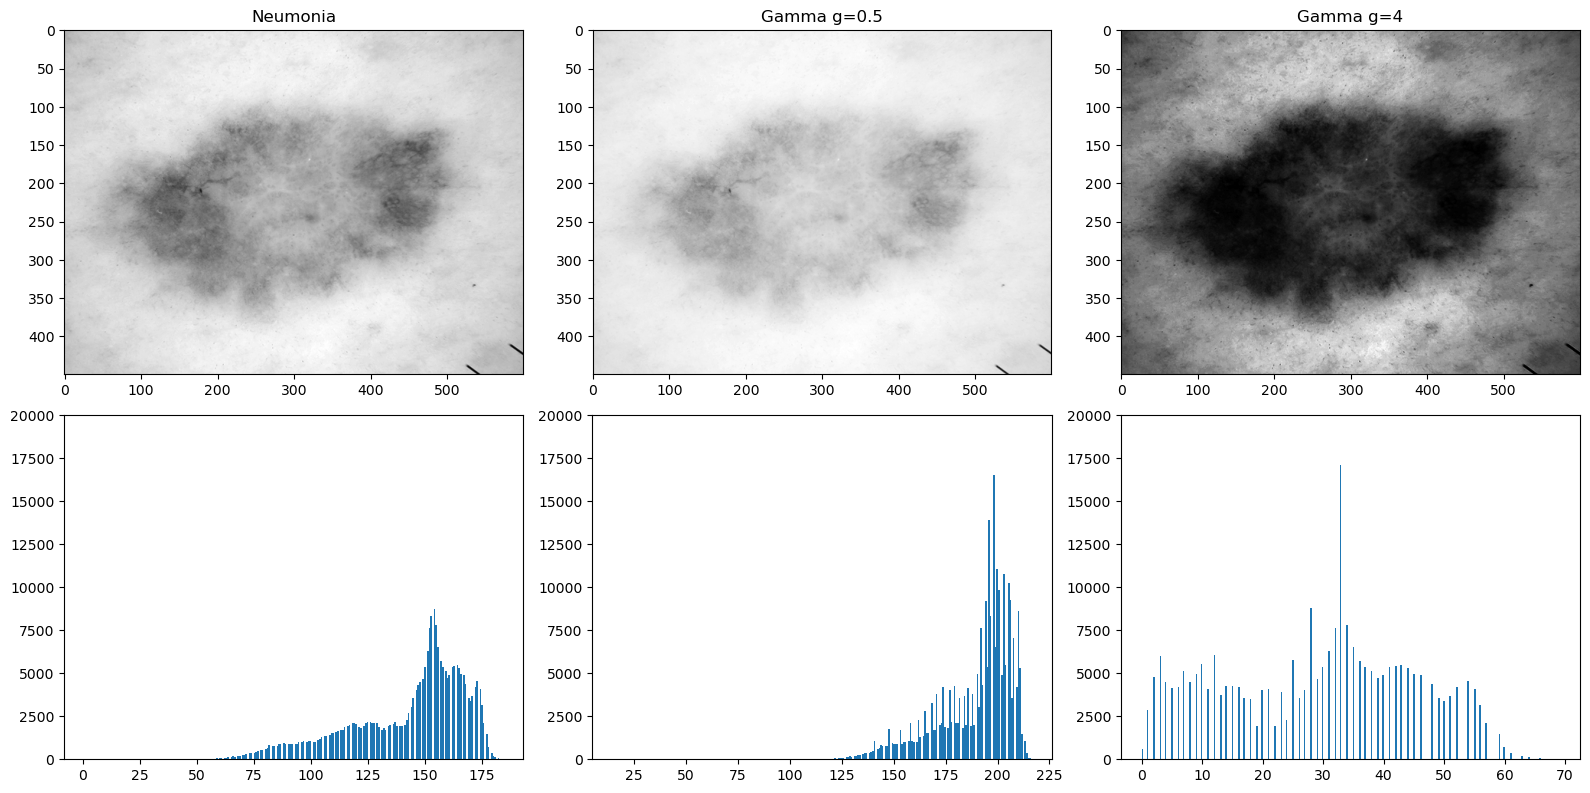

In [38]:
#FUNCIÓN PARA MOSTRAR IMÁGENES Y SUS HISTOGRAMAS (EL ANÁLISIS DEL HISTOGRAMA PUEDE DARNOS UNA IDEA DE LA DISTRIBUCIÓN DE LOS PÍXELES EN LA IMAGEN PARA PODER SEPARAR LOS OBJETOS DE ESTUDIO)
def histograma(img_neu):
    img_gamma_05, img_gamma_4 = gamma_correction(img_neu, 1,0.5), gamma_correction(img_neu, 1,4)
    fig, axs = plt.subplots(2, 3, figsize=(16, 8))

    # MOSTRAR IMÁGENES ORIGINALES Y FILTRADAS
    for i, (img, title) in enumerate(zip([img_neu, img_gamma_05, img_gamma_4],
                                         ["Neumonia", "Gamma g=0.5", "Gamma g=4"])):
        axs[0, i].imshow(img, cmap='gray'); axs[0, i].set_title(title)
        axs[1, i].hist(img.ravel(), bins=255); axs[1, i].set_ylim([0, 20000])

    plt.tight_layout(); plt.show()

#LLAMAMOS A LA FUNCIÓN HISTOGRAMA
histograma(img)

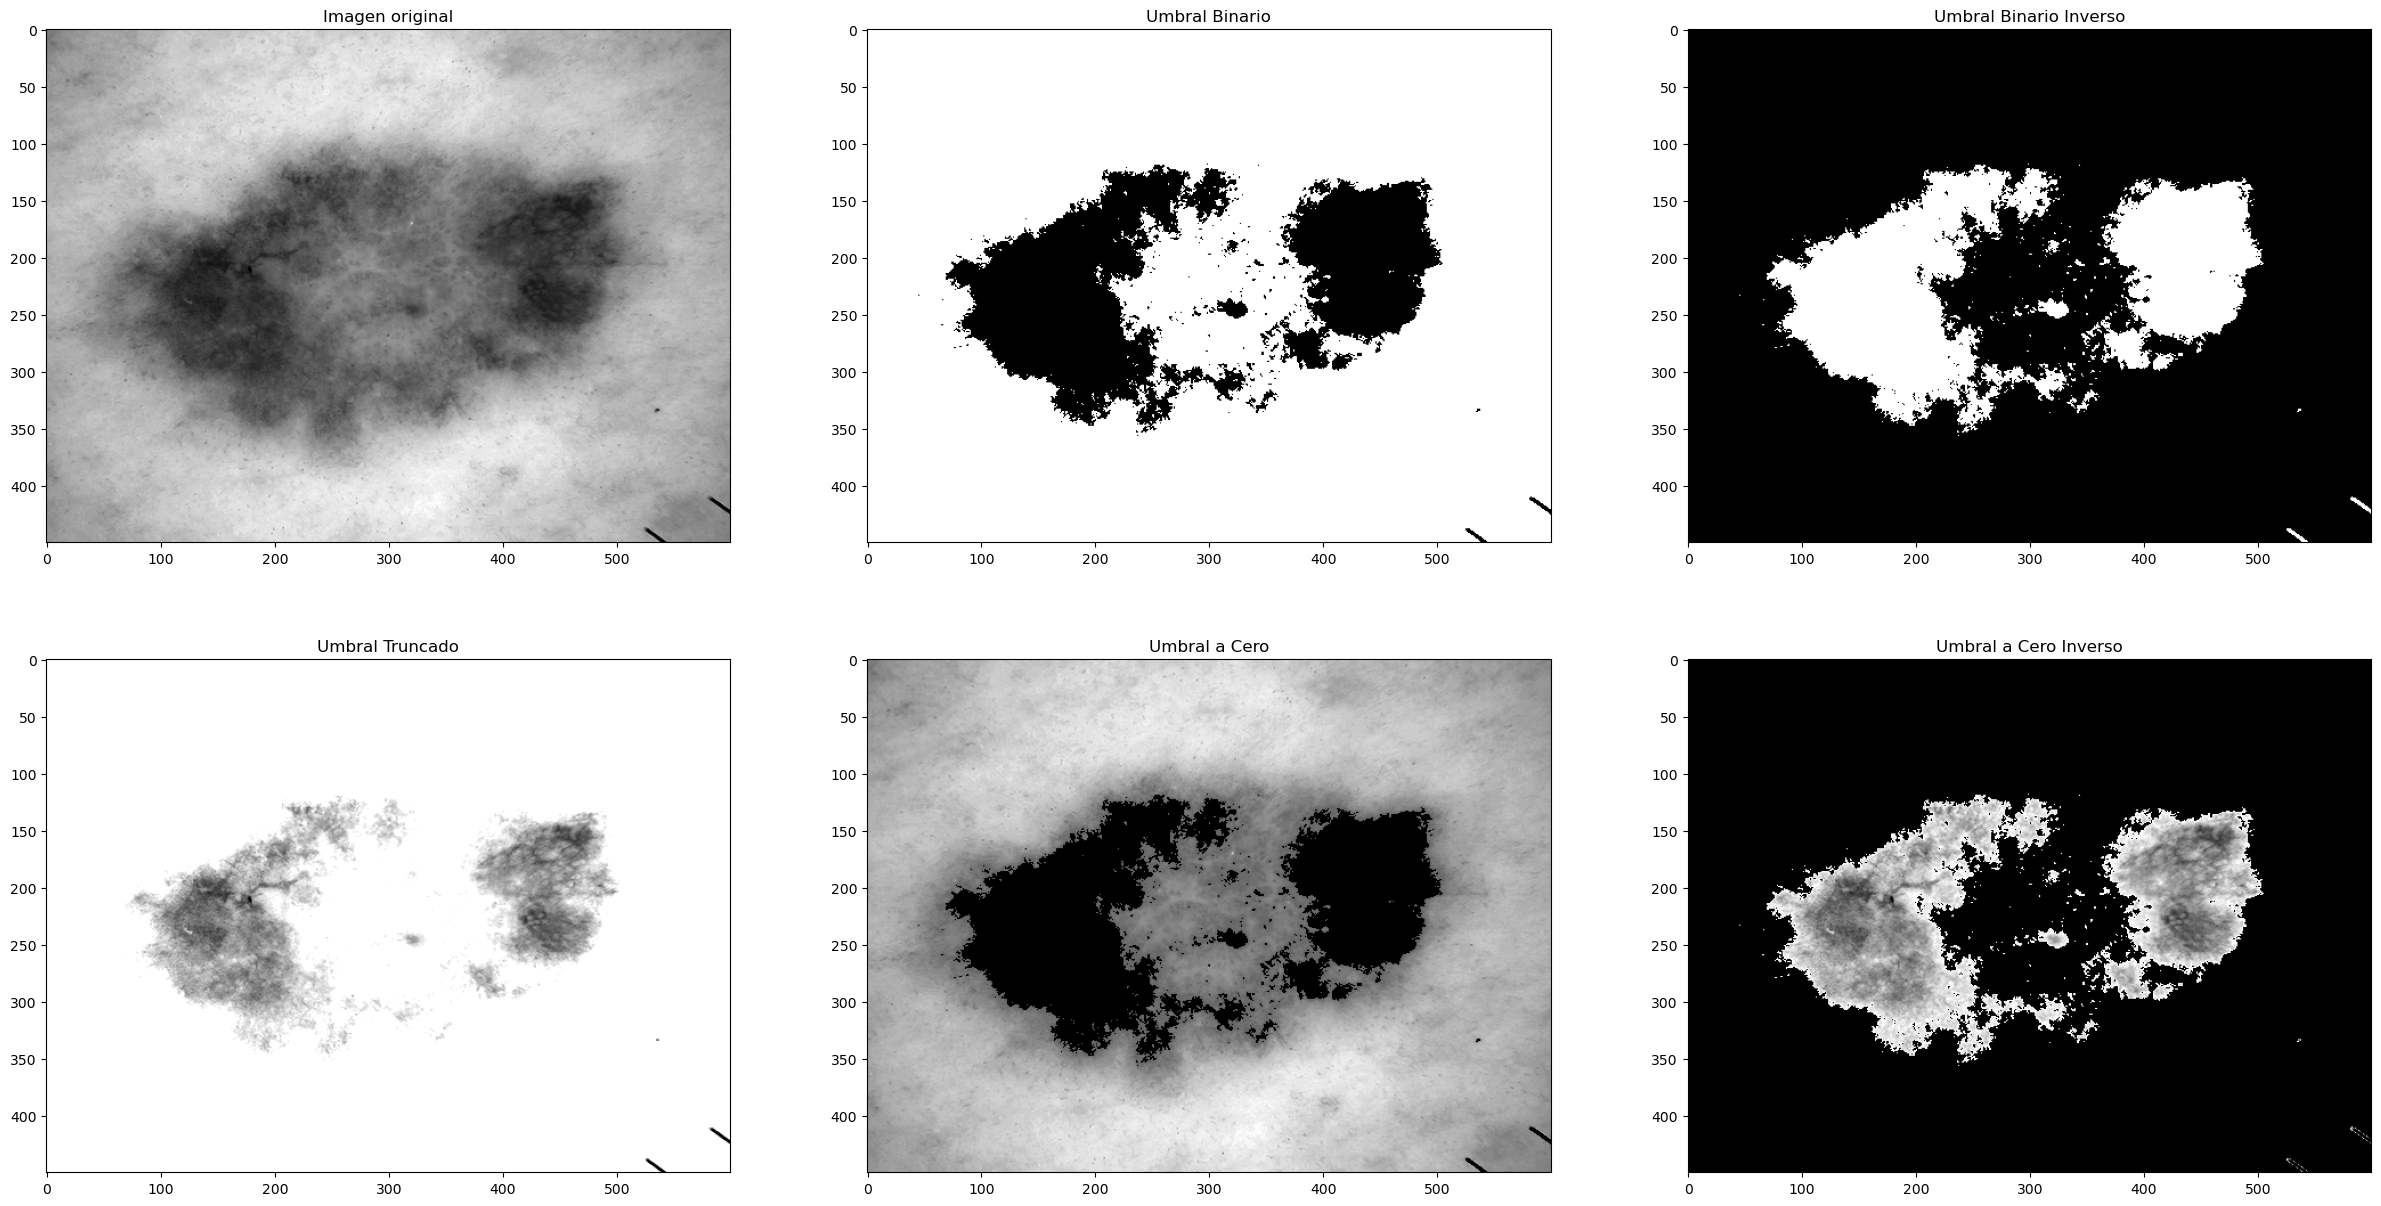

In [40]:
#DEFINIMOS LA FUNCIÓN DE TRESHOLDING PORQUE PERMITE RESALTAR OBJETOS DE INTERÉS EN LA IMAGEN
def aplicar_thresholds_and(img, threshold_value=50):

    #APLICAR UMBRALIZACIÓN UTILIZANDO DIFERENTES MÉTODOS
    _, thresh_binary = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
    _, thresh_binary_inv = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY_INV)
    _, thresh_trunc = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TRUNC)
    _, thresh_tozero = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TOZERO)
    _, thresh_tozero_inv = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TOZERO_INV)

    #CREAR SUBPLOTS PARA MOSTRAR LA IMAGEN ORIGINAL Y LOS RESULTADOS DE UMBRALIZACIÓN
    fig, axs = plt.subplots(2, 3, figsize=(30, 15))
    axs[0, 0].imshow(img, cmap='gray')
    axs[0, 0].title.set_text("Imagen original")

    axs[0, 1].imshow(thresh_binary, cmap='gray')
    axs[0, 1].title.set_text("Umbral Binario")

    axs[0, 2].imshow(thresh_binary_inv, cmap='gray')
    axs[0, 2].title.set_text("Umbral Binario Inverso")

    axs[1, 0].imshow(thresh_trunc, cmap='gray')
    axs[1, 0].title.set_text("Umbral Truncado")

    axs[1, 1].imshow(thresh_tozero, cmap='gray')
    axs[1, 1].title.set_text("Umbral a Cero")

    axs[1, 2].imshow(thresh_tozero_inv, cmap='gray')
    axs[1, 2].title.set_text("Umbral a Cero Inverso")

    #MOSTRAR LOS SUBPLOTS
    plt.show()

#LLAMAMOS A LA FUNCIÓN
aplicar_thresholds_and(gamma_correction(img,1,2))